In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sumbe
Processing Record 2 of Set 1 | ocean city
Processing Record 3 of Set 1 | anzio
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | muncar
Processing Record 7 of Set 1 | nizwa
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | north guwahati
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | umm jarr
City not found. Skipping...
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | belgrade
Proc

Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | stromness
Processing Record 38 of Set 4 | emerald
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | yinchuan
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | awjilah
Processing Record 46 of Set 4 | fillmore
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | aksum
Processing Record 50 of Set 4 | leua
Processing Record 1 of Set 5 | palana
Processing Record 2 of Set 5 | falkoping
City not found. Skipping...
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | zahvizdya
Processing Record 5 of Set 5 | bud
Processing Record 6 of Set 5 | puerto del rosario
Processing Record 7 of Set 5 | siguiri
Processing Record 8

Processing Record 25 of Set 8 | adra
Processing Record 26 of Set 8 | ulaanbaatar
Processing Record 27 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 28 of Set 8 | sao joao dos patos
Processing Record 29 of Set 8 | isla mujeres
Processing Record 30 of Set 8 | el rosario
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | palmer
Processing Record 34 of Set 8 | sycamore
Processing Record 35 of Set 8 | moryakovskiy zaton
Processing Record 36 of Set 8 | lodja
Processing Record 37 of Set 8 | kerepehi
Processing Record 38 of Set 8 | gravdal
Processing Record 39 of Set 8 | tullamore
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | ardistan
City not found. Skipping...
Processing Record 42 of Set 8 | solhan
Processing Record 43 of Set 8 | nador
Processing Record 44 of Set 8 | baghmara
Processing Record 45 of Set 8 | emba
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | kifri
P

Processing Record 14 of Set 12 | buraydah
Processing Record 15 of Set 12 | grand gaube
Processing Record 16 of Set 12 | grand forks
Processing Record 17 of Set 12 | ngama
Processing Record 18 of Set 12 | turukhansk
Processing Record 19 of Set 12 | hoquiam
Processing Record 20 of Set 12 | tsuruga
Processing Record 21 of Set 12 | marathon
Processing Record 22 of Set 12 | hervey bay
Processing Record 23 of Set 12 | zhangjiakou
Processing Record 24 of Set 12 | san andres
Processing Record 25 of Set 12 | ballina
Processing Record 26 of Set 12 | kendari
Processing Record 27 of Set 12 | whitecourt
Processing Record 28 of Set 12 | nyurba
Processing Record 29 of Set 12 | poykovskiy
Processing Record 30 of Set 12 | jaguarao
Processing Record 31 of Set 12 | prescott
Processing Record 32 of Set 12 | phalaborwa
Processing Record 33 of Set 12 | valparaiso
Processing Record 34 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 35 of Set 12 | kefamenanu
Processing Record 36 of Set 1

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sumbe,-11.2061,13.8437,78.31,85,100,3.38,AO,2021-04-20 03:12:37
1,Ocean City,39.2776,-74.5746,51.01,87,1,3.44,US,2021-04-20 03:12:38
2,Anzio,41.4853,12.6179,48.99,98,36,1.01,IT,2021-04-20 03:12:38
3,Tasiilaq,65.6145,-37.6368,26.60,50,20,3.44,GL,2021-04-20 03:12:38
4,Mount Gambier,-37.8333,140.7667,55.40,62,75,20.71,AU,2021-04-20 03:12:40
5,Muncar,-8.4333,114.3333,84.27,61,78,4.68,ID,2021-04-20 03:11:30
6,Nizwa,22.9333,57.5333,80.49,15,51,4.65,OM,2021-04-20 03:12:41
7,Broome,42.2506,-75.8330,48.20,61,1,6.91,US,2021-04-20 03:12:41
8,Hobart,-42.8794,147.3294,50.00,76,75,8.05,AU,2021-04-20 03:10:09
9,Mataura,-46.1927,168.8643,66.00,58,9,5.99,NZ,2021-04-20 03:07:42


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sumbe,AO,2021-04-20 03:12:37,-11.2061,13.8437,78.31,85,100,3.38
1,Ocean City,US,2021-04-20 03:12:38,39.2776,-74.5746,51.01,87,1,3.44
2,Anzio,IT,2021-04-20 03:12:38,41.4853,12.6179,48.99,98,36,1.01
3,Tasiilaq,GL,2021-04-20 03:12:38,65.6145,-37.6368,26.60,50,20,3.44
4,Mount Gambier,AU,2021-04-20 03:12:40,-37.8333,140.7667,55.40,62,75,20.71
...,...,...,...,...,...,...,...,...,...
559,Kimbe,PG,2021-04-20 03:14:59,-5.5502,150.1429,88.74,62,53,7.07
560,Khandyga,RU,2021-04-20 03:14:59,62.6667,135.6000,30.22,97,100,5.21
561,Qui Nhon,VN,2021-04-20 03:15:00,13.7667,109.2333,84.38,64,100,6.40
562,Medea,DZ,2021-04-20 03:15:00,36.2642,2.7539,51.80,76,0,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

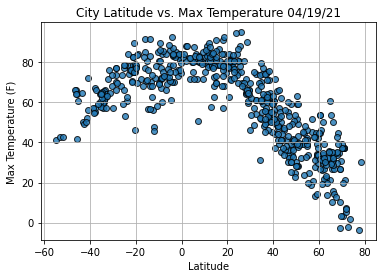

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

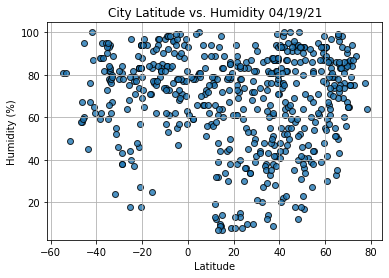

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

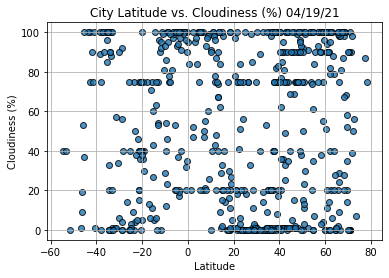

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

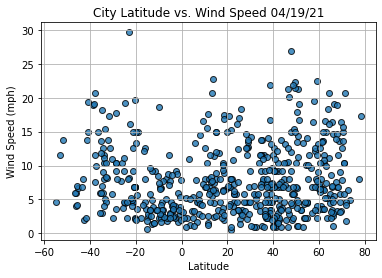

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sumbe,AO,2021-04-20 03:12:37,-11.2061,13.8437,78.31,85,100,3.38
1,Ocean City,US,2021-04-20 03:12:38,39.2776,-74.5746,51.01,87,1,3.44
2,Anzio,IT,2021-04-20 03:12:38,41.4853,12.6179,48.99,98,36,1.01
3,Tasiilaq,GL,2021-04-20 03:12:38,65.6145,-37.6368,26.60,50,20,3.44
4,Mount Gambier,AU,2021-04-20 03:12:40,-37.8333,140.7667,55.40,62,75,20.71
...,...,...,...,...,...,...,...,...,...
559,Kimbe,PG,2021-04-20 03:14:59,-5.5502,150.1429,88.74,62,53,7.07
560,Khandyga,RU,2021-04-20 03:14:59,62.6667,135.6000,30.22,97,100,5.21
561,Qui Nhon,VN,2021-04-20 03:15:00,13.7667,109.2333,84.38,64,100,6.40
562,Medea,DZ,2021-04-20 03:15:00,36.2642,2.7539,51.80,76,0,4.61


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[2]

In [24]:
index13

City                        Anzio
Country                        IT
Date          2021-04-20 03:12:38
Lat                       41.4853
Lng                       12.6179
Max Temp                    48.99
Humidity                       98
Cloudiness                     36
Wind Speed                   1.01
Name: 2, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
559    False
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ocean City,US,2021-04-20 03:12:38,39.2776,-74.5746,51.01,87,1,3.44
2,Anzio,IT,2021-04-20 03:12:38,41.4853,12.6179,48.99,98,36,1.01
3,Tasiilaq,GL,2021-04-20 03:12:38,65.6145,-37.6368,26.60,50,20,3.44
6,Nizwa,OM,2021-04-20 03:12:41,22.9333,57.5333,80.49,15,51,4.65
7,Broome,US,2021-04-20 03:12:41,42.2506,-75.8330,48.20,61,1,6.91


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ocean City,US,2021-04-20 03:12:38,39.2776,-74.5746,51.01,87,1,3.44
2,Anzio,IT,2021-04-20 03:12:38,41.4853,12.6179,48.99,98,36,1.01
3,Tasiilaq,GL,2021-04-20 03:12:38,65.6145,-37.6368,26.60,50,20,3.44
6,Nizwa,OM,2021-04-20 03:12:41,22.9333,57.5333,80.49,15,51,4.65
7,Broome,US,2021-04-20 03:12:41,42.2506,-75.8330,48.20,61,1,6.91
...,...,...,...,...,...,...,...,...,...
558,Whitehorse,CA,2021-04-20 03:14:59,60.7161,-135.0538,53.60,30,20,10.36
560,Khandyga,RU,2021-04-20 03:14:59,62.6667,135.6000,30.22,97,100,5.21
561,Qui Nhon,VN,2021-04-20 03:15:00,13.7667,109.2333,84.38,64,100,6.40
562,Medea,DZ,2021-04-20 03:15:00,36.2642,2.7539,51.80,76,0,4.61


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sumbe,AO,2021-04-20 03:12:37,-11.2061,13.8437,78.31,85,100,3.38
4,Mount Gambier,AU,2021-04-20 03:12:40,-37.8333,140.7667,55.40,62,75,20.71
5,Muncar,ID,2021-04-20 03:11:30,-8.4333,114.3333,84.27,61,78,4.68
8,Hobart,AU,2021-04-20 03:10:09,-42.8794,147.3294,50.00,76,75,8.05
9,Mataura,NZ,2021-04-20 03:07:42,-46.1927,168.8643,66.00,58,9,5.99
...,...,...,...,...,...,...,...,...,...
539,Lilongwe,MW,2021-04-20 03:14:53,-13.9669,33.7873,56.71,92,6,3.42
544,Matiri,TZ,2021-04-20 03:14:54,-10.7500,34.9000,58.39,90,99,3.44
554,Kaeo,NZ,2021-04-20 03:14:58,-35.1000,173.7833,64.00,95,100,5.99
555,Pimentel,PE,2021-04-20 03:14:58,-6.8367,-79.9342,66.00,84,81,5.01


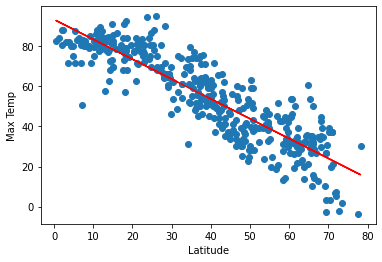

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

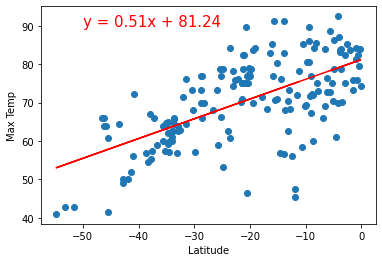

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

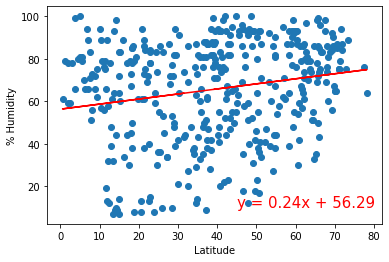

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

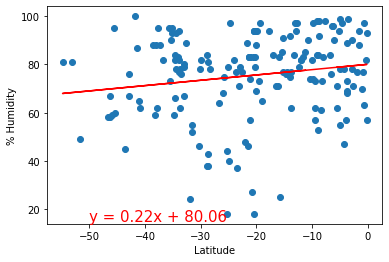

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

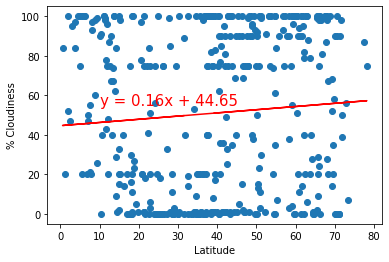

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

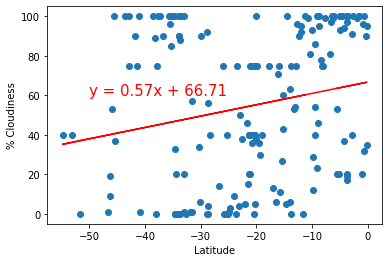

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

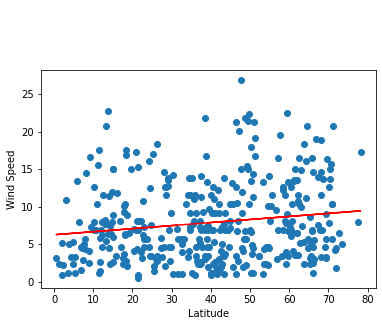

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

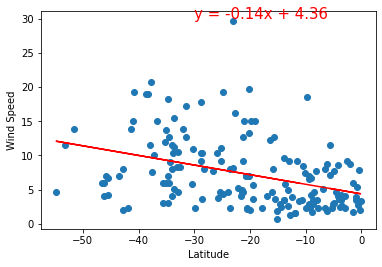

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [38]:
# # TROUBLE-SHOOTING MISSING TITLES
# 
# # Linear regression on the Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# # Call the function.
# plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 'Wind Speed',(-30,30))

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# LOC METHOD ON DATAFRAME
# 
# Next, filter the maximum temperature column in 
# the city_data_df DataFrame using logical operators 
# to create a new DataFrame with the cities that meet 
# the customer's criteria.
# 
# Recall that you use the loc[] method on the current 
# DataFrame to create a new DataFrame from a current 
# DataFrame. Inside the brackets, add the conditional 
# filter.

In [41]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sumbe,AO,2021-04-20 03:12:37,-11.2061,13.8437,78.31,85,100,3.38
5,Muncar,ID,2021-04-20 03:11:30,-8.4333,114.3333,84.27,61,78,4.68
6,Nizwa,OM,2021-04-20 03:12:41,22.9333,57.5333,80.49,15,51,4.65
13,Atuona,PF,2021-04-20 03:08:08,-9.8000,-139.0333,80.58,74,12,18.63
15,Mahebourg,MU,2021-04-20 03:08:00,-20.4081,57.7000,77.00,94,40,6.91
20,Rikitea,PF,2021-04-20 03:07:38,-23.1203,-134.9692,78.26,71,4,8.14
21,Kapaa,US,2021-04-20 03:08:01,22.0752,-159.3190,81.00,69,75,8.05
42,Finschhafen,PG,2021-04-20 03:12:47,-6.6024,147.8681,83.86,76,97,8.05
55,Avarua,CK,2021-04-20 03:08:58,-21.2078,-159.7750,78.80,83,75,12.66
56,Hithadhoo,MV,2021-04-20 03:11:48,-0.6000,73.0833,82.54,63,100,2.80


In [42]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [43]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.count()

City          159
Country       159
Date          159
Lat           159
Lng           159
Max Temp      159
Humidity      159
Cloudiness    159
Wind Speed    159
dtype: int64

In [44]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.notnull().sum()

City          159
Country       159
Date          159
Lat           159
Lng           159
Max Temp      159
Humidity      159
Cloudiness    159
Wind Speed    159
dtype: int64

In [45]:
preferred_cities_df.count()

City          159
Country       159
Date          159
Lat           159
Lng           159
Max Temp      159
Humidity      159
Cloudiness    159
Wind Speed    159
dtype: int64

In [46]:
# Consider the following guidance:
# 
# Depending on the time of year and the seasons, 
# you might have to adjust the minimum and maximum 
# temperature to get enough cities.
# 
# It is a good idea to keep the number of cities 
# to fewer than 200 to make it easier to plot the 
# markers on the heatmap.
# 
# If you have some rows with null values, you'll 
# need to drop them using the dropna() method at 
# the end of your filtering statement when you are 
# creating the new DataFrame.

In [47]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Sumbe,AO,78.31,-11.2061,13.8437,
5,Muncar,ID,84.27,-8.4333,114.3333,
6,Nizwa,OM,80.49,22.9333,57.5333,
13,Atuona,PF,80.58,-9.8000,-139.0333,
15,Mahebourg,MU,77.00,-20.4081,57.7000,
20,Rikitea,PF,78.26,-23.1203,-134.9692,
21,Kapaa,US,81.00,22.0752,-159.3190,
42,Finschhafen,PG,83.86,-6.6024,147.8681,
55,Avarua,CK,78.80,-21.2078,-159.7750,
56,Hithadhoo,MV,82.54,-0.6000,73.0833,


In [48]:
# Import the API key.
from config import g_key

In [49]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [50]:
# How would you retrieve the name of the first hotel in the results dictionary?
# 
# hotels["results"][0]["name"]